<a href="https://colab.research.google.com/github/Nico-Palacios/challenge-alura-store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [36]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [128]:
facturacion1 = sum(tienda['Precio'])
facturacion2 = sum(tienda2['Precio'])
facturacion3 = sum(tienda3['Precio'])
facturacion4 = sum(tienda4['Precio'])
print(f'Los ingresos de cada tienda son:\nTienda 1: {facturacion1}$ \nTienda 2: {facturacion2}$ \nTienda 3: {facturacion3}$ \nTienda 4: {facturacion4}$')

Los ingresos de cada tienda son:
Tienda 1: 1150880400.0$ 
Tienda 2: 1116343500.0$ 
Tienda 3: 1098019600.0$ 
Tienda 4: 1038375700.0$


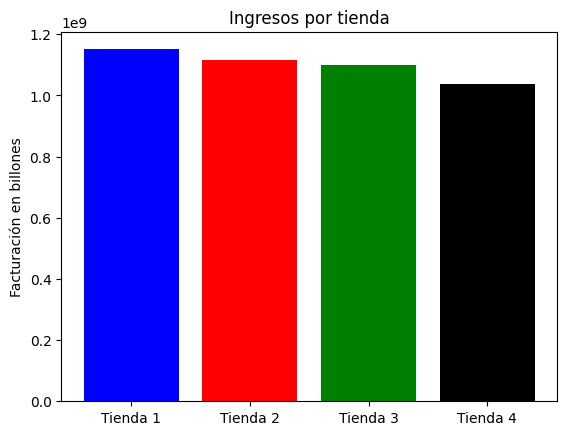

In [4]:
import matplotlib.pyplot as plt
facturacionTiendas = [facturacion1, facturacion2, facturacion3, facturacion4]
nombresTiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
plt.bar(nombresTiendas, facturacionTiendas, color=['b', 'r', 'g', 'k'])
plt.title('Ingresos por tienda')
plt.ylabel('Facturación en billones')
plt.show()

El grafico muestra un analisis de los ingresos que recibio cada tienda, dando a la tienda 4 como la de menor ingresos.

# 2. Ventas por categoría

In [126]:
import numpy as np

def ventasCategorias(dato):
  electronicos = int((dato['Categoría del Producto'] == 'Electrónicos').sum())
  muebles = int((dato['Categoría del Producto'] == 'Muebles').sum())
  juguetes = int((dato['Categoría del Producto'] == 'Juguetes').sum())
  electrodomesticos = int((dato['Categoría del Producto'] == 'Electrodomésticos').sum())
  hogar = int((dato['Categoría del Producto'] == 'Artículos para el hogar').sum())
  deportes = int((dato['Categoría del Producto'] == 'Deportes y diversión').sum())
  libros = int((dato['Categoría del Producto'] == 'Libros').sum())
  musica = int((dato['Categoría del Producto'] == 'Instrumentos musicales').sum())
  return [electronicos, muebles, juguetes, electrodomesticos, hogar, deportes, libros, musica]

ventasTienda1 = ventasCategorias(tienda)
ventasTienda2 = ventasCategorias(tienda2)
ventasTienda3 = ventasCategorias(tienda3)
ventasTienda4 = ventasCategorias(tienda4)
categorias = ['Electrónicos', 'Muebles', 'Juguetes', 'Electrodomésticos', 'Artículos para\n el hogar', 'Deportes y\n diversión', 'Libros', 'Instrumentos\n musicales']
tiendas = {'Tienda 1': ventasTienda1,
           'Tienda 2': ventasTienda2,
           'Tienda 3': ventasTienda3,
           'Tienda 4': ventasTienda4}


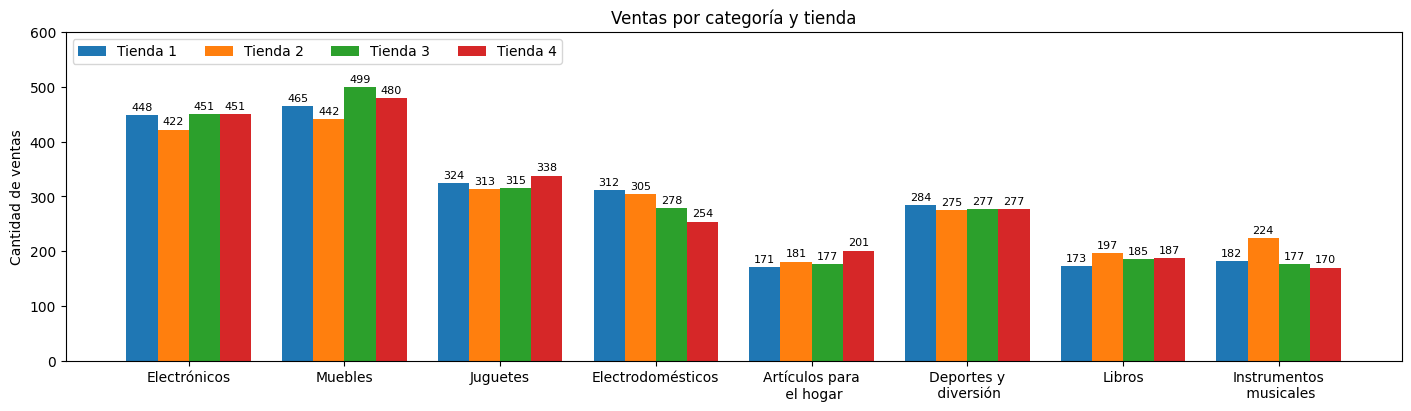

In [6]:
x = np.arange(len(categorias))
width = 0.2
multiplier = 0

fig, ax = plt.subplots(figsize=(14, 4), layout='constrained')

for attribute, measurement in tiendas.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=2, fontsize=8)
    multiplier += 1

ax.set_title('Ventas por categoría y tienda')
ax.set_ylabel('Cantidad de ventas')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(categorias)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 600)

plt.show()

En el grafico se puede observar las ventas por categoria de cada tienda, siendo la venta de Muebles la mas popular de cada tienda.

# 3. Calificación promedio de la tienda


In [119]:
def calificaciones(dato):
  promedio = sum(dato['Calificación'])
  return round(promedio / len(dato['Calificación']), 1)

calificacion1 = calificaciones(tienda)
calificacion2 = calificaciones(tienda2)
calificacion3 = calificaciones(tienda3)
calificacion4 = calificaciones(tienda4)
tiendasCalificadas = [calificacion1, calificacion2, calificacion3, calificacion4]

for i in range(len(tiendasCalificadas)):
  print(f'La calificacion de la tienda {i+1} es: {tiendasCalificadas[i]}')


La calificacion de la tienda 1 es: 4.0
La calificacion de la tienda 2 es: 4.0
La calificacion de la tienda 3 es: 4.0
La calificacion de la tienda 4 es: 4.0


Todas las tiendas poseen una media de calificacion de 4★.

# 4. Productos más y menos vendidos

In [115]:
def productosVendidos(dato):
  cantidad = [0] * len(productos)
  for i in range(len(productos)):
    for elemento in dato['Producto']:
      if (productos[i] == elemento):
        cantidad[i] += 1
  return cantidad

productos = []
for producto in tienda['Producto']:
  if (producto not in productos):
    productos.append(producto)

cantidad1 = productosVendidos(tienda)
cantidad2 = productosVendidos(tienda2)
cantidad3 = productosVendidos(tienda3)
cantidad4 = productosVendidos(tienda4)

In [117]:
cantidades = [cantidad1, cantidad2, cantidad3, cantidad4]

for i in range(len(cantidades)):
  mayor = max(cantidades[i])
  menor = min(cantidades[i])
  posMayor = cantidades[i].index(mayor)
  posMenor = cantidades[i].index(menor)
  print(f'Tienda {i+1}')
  print(f'Producto mas vendido: {productos[posMayor]} con {mayor} ventas')
  print(f'Producto menos vendido: {productos[posMenor]} con {menor} ventas\n')


Tienda 1
Producto mas vendido: Microondas con 60 ventas
Producto menos vendido: Auriculares con micrófono con 33 ventas

Tienda 2
Producto mas vendido: Iniciando en programación con 65 ventas
Producto menos vendido: Juego de mesa con 32 ventas

Tienda 3
Producto mas vendido: Kit de bancas con 57 ventas
Producto menos vendido: Bloques de construcción con 35 ventas

Tienda 4
Producto mas vendido: Cama box con 62 ventas
Producto menos vendido: Guitarra eléctrica con 33 ventas



# 5. Envío promedio por tienda

In [114]:
promedio = lambda x: sum(x) / len(x)
costo1 = round(promedio(tienda['Costo de envío']), 2)
costo2 = round(promedio(tienda2['Costo de envío']), 2)
costo3 = round(promedio(tienda3['Costo de envío']), 2)
costo4 = round(promedio(tienda4['Costo de envío']), 2)
nombresTiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
costos = [costo1, costo2, costo3, costo4]
print('El promedio de gasto por envío de cada tienda es:\n')
for i in range(len(costos)):
  print(f'Tienda {i+1}: {costos[i]}$')


El promedio de gasto por envío de cada tienda es:

Tienda 1: 26018.61$
Tienda 2: 25216.24$
Tienda 3: 24805.68$
Tienda 4: 23459.46$


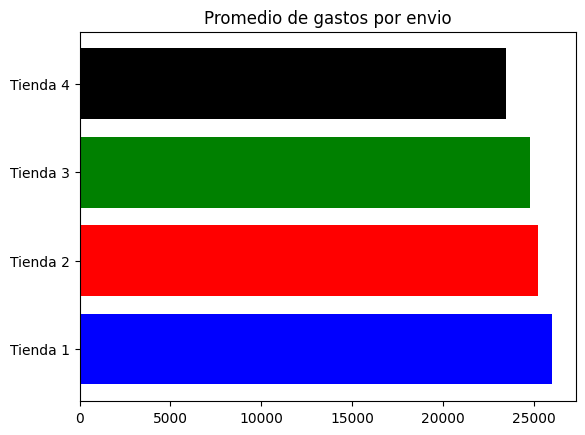

In [111]:
plt.barh(nombresTiendas, costos, color=['b', 'r', 'g', 'k'])
plt.title('Promedio de gastos por envio')
plt.show()

En el grafico se puede observar como la Tienda 1 es la tienda que posee un mayor gasto por envio en relación a las otras.

# **Informe Final**


---


##**Introduccion**
El presente informe tiene como objetivo analizar el desempeño de las tiendas del Sr. Juan con el fin de determinar cuál de ellas debería ser vendida. Para ello, se analizaron distintos factores clave que se veran a continuación.

---



##**Análisis del problema**
El problema consiste en ayudar a el Sr. Juan a decidir que tienda debe vender, teniendo en cuenta los factores analizados a lo largo del programa, los cuales son:

###Análisis de Facturación:
Al analizar los ingresos totales de cada tienda, se determinó que la Tienda 4 es la de menor ingresos.

###Ventas por categoría:
Al analizar los productos más vendidos por categoría, se determinó que la categoria más vendida en todas las tiendas es la de Muebles.
Tambien se determinó que la categoría menos vendida en las tiendas 1, 2 y 3 es la de Artículos para el Hogar, la tienda 3 con categoría de Instrumentos Musicales como la menos vendida junto con la tienda 4.

###Calificación promedio de la tienda:
Al analizar el promedio de las calificaciones de cada tienda, se determino que todas las tiendas poseen un promedio de calificación de 4★.

###Productos más y menos vendidos:
Al analizar los productos más y menos vendidos de cada tienda, se determinó que en la Tienda 1 el producto más vendido es Microondas con 60 ventas y el menos vendido es Auriculares con micrófono con 33 ventas, en la Tienda 2 el producto más vendido es Iniciando en programación con 65 ventas y el menos vendido es Juego de mesa con 32 ventas, en la Tienda 3 el producto más vendido es Kit de bancas con 57 ventas y el menos vendido es Bloques de construcción con 35 ventas y en la Tienda 4 el producto más vendido es Cama box con 62 ventas y el menos vendido es Guitarra eléctrica con 33 ventas.

###Envío promedio por tienda:
Al analizar el gasto de envio promedio de cada tienda, se determinó que la tienda con mayor gasto por envío es la Tienda 1.

---



##**Reflección Final**
Despues de realizar un análisis exaustivo al problema, puedo concluír que la tienda que debería ser vendida es la 4 ya que pese a tener el menor costo de envíos por producto, la diferencia no es muy amplia, pero en el análisis de facturacion se determinó que es la de menor ingresos, haciendo que esta tenga la menor rentabalidad en comparación a las demás tiendas.